In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np
import seaborn as sns

df = pd.concat(pd.read_excel("Dados/202008.xlsx", sheet_name=None), ignore_index=True)
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo2", "Unnamed: 4" : "Lançamento", 'Unnamed: 10' : 'Nr Litros', "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.dropna(axis="columns")
pd.set_option('display.max_rows', df.shape[0]+1)
df = df.drop(['EQAL', 'Exerc.', 'Exerc..1', 'Liquidação', 'Tipo.1', 'Serie', 'Valor Ajustado', 'Nr.  Lcto Fitcard', 'Lançamento  Nr. Ordem\nAbast.'], axis = 1)
df = df.rename(columns={"Tipo2" : "Tipo"})
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Data  Nr Frota     Placa   Tipo   Produto  Nr Litros  Valor Abast.
0    01/08/2020     92046  ALE-6725  Abast  GASOLINA     50.290        203.68
1    01/08/2020     79475   BDG0H58  Abast    DIESEL     29.431         95.66
2    01/08/2020     79444  ATL-9834  Abast    ETANOL     50.480        130.75
3    01/08/2020     79464  BCD-6525  Abast    ETANOL     37.456         97.02
4    01/08/2020     79462  BCD-6523  Abast    ETANOL     47.800        133.37
5    01/08/2020     79467  BCD-6528  Abast    ETANOL     42.548        118.72
6    01/08/2020     79465  BCD-6526  Abast    ETANOL     42.832        119.51
7    03/08/2020     78012  AKF-2842  Abast    DIESEL    102.154        332.01
8    03/08/2020     77114  AAW-6742  Abast  GASOLINA     36.090        146.17
9    03/08/2020     31102  AZR-9543  Abast    DIESEL    148.000        481.01
10   03/08/2020     79453  BCC-4701  Abast    ETANOL     45.380        126.62
11   03/08/2020     79463  BCD-6524  Abast    ETANOL     46.340        120.03
12   03/08/2020     79450  BAB-6291  Abast    DIESEL     52.171        176.87
13   03/08/2020     87009  EQU-8709  Abast  GASOLINA     13.600         56.99
14   03/08/2020     79469  BCD-6603  Abast    ETANOL     41.692        116.33
15   03/08/2020     79457  BCC-4713  Abast    ETANOL     43.410        121.10
16   03/08/2020     79455  BCC-4703  Abast    ETANOL     44.519        115.31
17   03/08/2020     77109  AAW-6734  Abast  GASOLINA     13.706         55.52
18   03/08/2020     79480  AJV-8229  Abast  GASOLINA     32.910        134.64
19   03/08/2020     79433  ARV-7211  Abast    ETANOL     40.640        117.46
20   03/08/2020     79445  ATL-9829  Abast    ETANOL     46.950        131.00
21   03/08/2020     79458  BCD-6853  Abast    ETANOL     38.459        107.31
22   03/08/2020     79438  ASZ-7061  Abast  GASOLINA      8.460         36.30
23   04/08/2020     79449  AYE-7591  Abast    ETANOL     32.150         92.92
24   04/08/2020     79473  AJU-6529  Abast    DIESEL     83.191        270.38
25   04/08/2020     79435  ASZ-6991  Abast  GASOLINA     10.070         41.20
26   04/08/2020     79440  ATM-6450  Abast  GASOLINA     47.520        213.37
27   04/08/2020     31001  AJH-4351  Abast    DIESEL    104.615        340.01
28   04/08/2020     79437  ASZ-7083  Abast  GASOLINA      9.379         38.37
29   04/08/2020     79452  BCC-4699  Abast    ETANOL     38.890        108.79
30   04/08/2020     79432  ARV-7425  Abast    ETANOL     43.020        120.04
31   04/08/2020     79479   BDL0C63  Abast    DIESEL    153.846        500.01
32   05/08/2020     79476   BDI4E74  Abast    DIESEL    179.600        609.06
33   05/08/2020     79464  BCD-6525  Abast    ETANOL     36.450        105.35
34   05/08/2020     79462  BCD-6523  Abast    ETANOL     44.650        124.58
35   05/08/2020     79478   BDH3B38  Abast    DIESEL     81.410        284.13
36   05/08/2020     79447  ATL-9887  Abast    ETANOL     50.540        146.07
37   05/08/2020     78012  AKF-2842  Abast    DIESEL    101.538        330.01
38   06/08/2020     79473  AJU-6529  Abast    DIESEL    106.154        345.01
39   06/08/2020     79466  BCD-6527  Abast    ETANOL     47.771        133.29
40   06/08/2020     79456  BCC-4704  Abast    ETANOL     42.511        110.11
41   06/08/2020     93011  ATW-9412  Abast  GASOLINA     10.030         41.07
42   06/08/2020     79454  BCC-4702  Abast    ETANOL     43.609        130.40
43   06/08/2020     79461  BCD-6871  Abast    ETANOL     45.922        128.13
44   06/08/2020     93018  ATW-9367  Abast  GASOLINA      6.738         29.59
45   06/08/2020     79435  ASZ-6991  Abast  GASOLINA      8.810         36.04
46   06/08/2020     79448  AVI-8154  Abast    ETANOL     39.770        110.97
47   06/08/2020     79465  BCD-6526  Abast    ETANOL     38.370        107.06
48   06/08/2020     79444  ATL-9834  Abast    ETANOL     40.488        112.97
49   06/08/2020     79463  BCD-6524  Abast    ETANOL     37.752        103.45
50   07/08/2020     79479   BDL0C

In [2]:
from pandas_profiling import ProfileReport

profile = df.profile_report(
      sort='ascending',
      vars={
          'num':{'low_categorical_threshold': 0},
          'cat':{
            'length':True,
            'unicode':False,
            'n_obs': 5,
          }
      }
)

profile.set_variable('variables.descriptions',
    {
      'files': 'Files in the filesystem',
      'datec': 'Creation date',
      'datem': 'Modification date',
    }
)

profile.to_file("Pandas_Profiling/201905-PP.html")

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


In [3]:
from pivottablejs import pivot_ui

pivot_ui(df, outfile_path='PivottableJS/201905-PJS.html')

In [4]:
df["Nr Litros"].mean()
#df["Valor Abast."].std()
#df["Valor Ajustado"].std()

54.117647302904594

In [5]:
df.sort_values(by="Nr Litros")

Data  Nr Frota     Placa   Tipo   Produto  Nr Litros  Valor Abast.
44   06/08/2020     93018  ATW-9367  Abast  GASOLINA      6.738         29.59
212  27/08/2020     93014  ATW-9372  Abast  GASOLINA      7.000         30.04
190  25/08/2020     79438  ASZ-7061  Abast  GASOLINA      7.700         33.04
56   07/08/2020     79438  ASZ-7061  Abast  GASOLINA      8.150         33.34
105  12/08/2020     79438  ASZ-7061  Abast  GASOLINA      8.211         33.59
22   03/08/2020     79438  ASZ-7061  Abast  GASOLINA      8.460         36.30
53   07/08/2020     79437  ASZ-7083  Abast  GASOLINA      8.501         35.63
124  15/08/2020     79435  ASZ-6991  Abast  GASOLINA      8.510         38.22
205  26/08/2020     93009  ATW-9378  Abast  GASOLINA      8.670         36.31
45   06/08/2020     79435  ASZ-6991  Abast  GASOLINA      8.810         36.04
91   11/08/2020     79435  ASZ-6991  Abast  GASOLINA      9.230         37.76
28   04/08/2020     79437  ASZ-7083  Abast  GASOLINA      9.379         38.37
182  24/08/2020     79437  ASZ-7083  Abast  GASOLINA      9.502         40.77
238  31/08/2020     79437  ASZ-7083  Abast  GASOLINA      9.940         42.65
41   06/08/2020     93011  ATW-9412  Abast  GASOLINA     10.030         41.07
25   04/08/2020     79435  ASZ-6991  Abast  GASOLINA     10.070         41.20
199  26/08/2020     79435  ASZ-6991  Abast  GASOLINA     10.080         43.25
225  28/08/2020     79435  ASZ-6991  Abast  GASOLINA     10.109         46.41
184  24/08/2020     93011  ATW-9412  Abast  GASOLINA     10.350         44.41
13   03/08/2020     87009  EQU-8709  Abast  GASOLINA     13.600         56.99
17   03/08/2020     77109  AAW-6734  Abast  GASOLINA     13.706         55.52
219  28/08/2020     87009  EQU-8709  Abast  GASOLINA     15.781         67.71
75   10/08/2020     87019  EQU-8719  Abast  GASOLINA     17.610         71.33
102  12/08/2020     87009  EQU-8709  Abast  GASOLINA     19.220         78.62
72   10/08/2020     87012  EQU-8712  Abast  GASOLINA     20.000         86.07
74   10/08/2020     87009  EQU-8709  Abast  GASOLINA     20.390         85.44
150  19/08/2020     79413  AHQ-1425  Abast  GASOLINA     23.620         95.67
92   11/08/2020     79431  ARV-7286  Abast  GASOLINA     24.701        100.05
77   10/08/2020     79433  ARV-7211  Abast    ETANOL     25.340         70.71
234  31/08/2020     87011  EQU-8711  Abast    DIESEL     26.380         92.08
208  27/08/2020     79417  AJM-9211  Abast  GASOLINA     26.590        111.41
231  31/08/2020     79449  AYE-7591  Abast    ETANOL     27.931         80.73
85   11/08/2020     87015  EQU-8715  Abast  GASOLINA     28.721        116.33
170  21/08/2020     77100  AAW-2751  Abast  GASOLINA     29.050        118.82
52   07/08/2020     77166  AMN-4156  Abast  GASOLINA     29.260        119.64
1    01/08/2020     79475   BDG0H58  Abast    DIESEL     29.431         95.66
148  19/08/2020     77114  AAW-6742  Abast  GASOLINA     29.455        119.01
149  19/08/2020     79412  AHI-8548  Abast  GASOLINA     30.570        123.82
197  26/08/2020     79449  AYE-7591  Abast    ETANOL     31.239         90.29
215  27/08/2020     79481  ATU-6517  Abast    ETANOL     31.310         84.23
61   07/08/2020     79505  AHR-3194  Abast  GASOLINA     31.470        128.72
23   04/08/2020     79449  AYE-7591  Abast    ETANOL     32.150         92.92
68   10/08/2020     79449  AYE-7591  Abast    ETANOL     32.212         89.98
164  21/08/2020     79449  AYE-7591  Abast    ETANOL     32.799         98.08
18   03/08/2020     79480  AJV-8229  Abast  GASOLINA     32.910        134.64
67   09/08/2020     79465  BCD-6526  Abast    ETANOL     33.211         88.01
142  18/08/2020     79471  BCD-6854  Abast    ETANOL     33.611         87.06
196  26/08/2020     79413  AHQ-1425  Abast  GASOLINA     34.070        141.40
119  14/08/2020     79449  AYE-7591  Abast    ETANOL     34.471         99.63
158  20/08/2020     79417  AJM-9211  Abast  GASOLINA     35.085        142.10
160  20/08/2020     79480  AJV-82

In [6]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

Data  Nr Frota     Placa   Tipo   Produto  Nr Litros  Valor Abast.
65   08/08/2020     79474  EQU-4283  Abast    DIESEL    239.140        777.21
165  21/08/2020     79476   BDI4E74  Abast    DIESEL    235.420        727.47
209  27/08/2020     79479   BDL0C63  Abast    DIESEL    207.271        681.93
210  27/08/2020     79476   BDI4E74  Abast    DIESEL    183.110        639.06
32   05/08/2020     79476   BDI4E74  Abast    DIESEL    179.600        609.06
167  21/08/2020     79479   BDL0C63  Abast    DIESEL    179.140        582.21
221  28/08/2020     31102  AZR-9543  Abast    DIESEL    167.173        550.01
90   11/08/2020     79476   BDI4E74  Abast    DIESEL    161.831        556.71
86   11/08/2020     31102  AZR-9543  Abast    DIESEL    159.077        517.01
87   11/08/2020     79479   BDL0C63  Abast    DIESEL    156.942        510.07
31   04/08/2020     79479   BDL0C63  Abast    DIESEL    153.846        500.01
139  18/08/2020     31102  AZR-9543  Abast    DIESEL    153.846        500.01
50   07/08/2020     79479   BDL0C63  Abast    DIESEL    150.782        490.05
9    03/08/2020     31102  AZR-9543  Abast    DIESEL    148.000        481.01
95   11/08/2020     31041  AIA-7621  Abast    DIESEL    138.462        450.01
111  13/08/2020     79479   BDL0C63  Abast    DIESEL    136.942        445.07
176  24/08/2020     31102  AZR-9543  Abast    DIESEL    124.924        411.01
130  17/08/2020     79477   BDI6E74  Abast    DIESEL    122.501        415.29
217  28/08/2020     79473  AJU-6529  Abast    DIESEL    119.021        391.59
214  27/08/2020     31041  AIA-7621  Abast    DIESEL    118.550        390.04
88   11/08/2020     79473  AJU-6529  Abast    DIESEL    109.902        357.19
211  27/08/2020     78040  AEO-9326  Abast    DIESEL    106.252        349.58
38   06/08/2020     79473  AJU-6529  Abast    DIESEL    106.154        345.01
27   04/08/2020     31001  AJH-4351  Abast    DIESEL    104.615        340.01
7    03/08/2020     78012  AKF-2842  Abast    DIESEL    102.154        332.01
129  17/08/2020     79473  AJU-6529  Abast    DIESEL    101.610        330.24
37   05/08/2020     78012  AKF-2842  Abast    DIESEL    101.538        330.01
177  24/08/2020     78045  AEQ-0562  Abast    DIESEL    100.410        330.36
78   10/08/2020     78040  AEO-9326  Abast    DIESEL     99.711        324.07
69   10/08/2020     78012  AKF-2842  Abast    DIESEL     97.231        316.01
96   12/08/2020     78012  AKF-2842  Abast    DIESEL     95.385        310.01
216  27/08/2020     41019  EQU-4119  Abast    DIESEL     94.833        312.01
180  24/08/2020     79439  ATJ-8583  Abast    DIESEL     91.241        300.19
163  21/08/2020     78012  AKF-2842  Abast    DIESEL     86.957        282.62
207  26/08/2020     79442  ATM-6233  Abast    DIESEL     84.036        276.49
188  25/08/2020     79473  AJU-6529  Abast    DIESEL     83.550        274.89
24   04/08/2020     79473  AJU-6529  Abast    DIESEL     83.191        270.38
114  13/08/2020     79442  ATM-6233  Abast    DIESEL     81.802        269.14
35   05/08/2020     79478   BDH3B38  Abast    DIESEL     81.410        284.13
237  31/08/2020     31001  AJH-4351  Abast    DIESEL     78.419        258.01
115  14/08/2020     78012  AKF-2842  Abast    DIESEL     77.538        252.01
97   12/08/2020     79439  ATJ-8583  Abast    DIESEL     76.240        247.79
70   10/08/2020     78045  AEQ-0562  Abast    DIESEL     75.320        244.80
178  24/08/2020     78012  AKF-2842  Abast    DIESEL     74.602        245.45
93   11/08/2020     79478   BDH3B38  Abast    DIESEL     74.121        251.28
123  15/08/2020     79478   BDH3B38  Abast    DIESEL     74.091        251.18
235  31/08/2020     41019  EQU-4119  Abast    DIESEL     67.954        223.55
232  31/08/2020     78045  AEQ-0562  Abast    DIESEL     64.690        212.84
120  14/08/2020     79472  BCG-4255  Abast    DIESEL     61.196        225.82
133  17/08/2020     79422  AJN-3794  Abast  GASOLINA     59.771        244.47
132  17/08/2020     79441  ATM-64

In [7]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

Data  Nr Frota     Placa   Tipo   Produto  Nr Litros  Valor Abast.
133  17/08/2020     79422  AJN-3794  Abast  GASOLINA     59.771        244.47

In [8]:
dfg = df[df["Produto"] == 'GASOLINA']
dfe = df[df["Produto"] == 'ETANOL']
dfd = df[df["Produto"] == 'DIESEL']

In [9]:
# Check if there is a vehicle that uses 'ETANOL' and 'DIESEL'
dfc = dfd.merge(dfe['Placa'], left_on='Placa', right_on='Placa')
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dft = dfc.groupby(["Placa", "Produto"]).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
dft

Empty DataFrame
Columns: [Valor Abast., Nr Litros]
Index: []

In [10]:
# Check if there is a vehicle that uses 'GASOLINA' and 'DIESEL'
dfc = dfd.merge(dfg['Placa'], left_on='Placa', right_on='Placa')
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dft = dfc.groupby(["Placa", "Produto"]).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})

In [11]:
# Check if there is vehicles that use 'GASOLINA' and 'ETANOL'
dfg = df[df["Produto"] == 'GASOLINA']
dfe = df[df["Produto"] == 'ETANOL']
dfd = df[df["Produto"] == 'DIESEL']
dfc = dfg.merge(dfe['Placa'], left_on='Placa', right_on='Placa')
dfc = dfc.drop_duplicates(subset=['Placa', 'Nr Litros'])
dfc = df.merge(dfc['Placa'], left_on='Placa', right_on='Placa')
dfc = dfc.drop_duplicates(subset=['Placa', 'Nr Litros'])
dft = dfc.groupby(['Placa', 'Produto']).agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
dft['Valor Litro'] = dft['Valor Abast.'] / dft['Nr Litros']
dft['Valor Litro'] = dft['Valor Litro'].round(2)
dft = dft.reset_index()
dft

Placa   Produto  Valor Abast.  Nr Litros  Valor Litro
0   ATL-9887    ETANOL        416.45    147.442         2.82
1   ATL-9887  GASOLINA        194.49     47.551         4.09
2   ATM-6450    ETANOL        126.31     45.270         2.79
3   ATM-6450  GASOLINA        213.37     47.520         4.49
4   BCC-4701    ETANOL        259.46     92.990         2.79
5   BCC-4701  GASOLINA        184.95     43.110         4.29
6   BCC-4703    ETANOL        239.35     92.407         2.59
7   BCC-4703  GASOLINA        176.67     43.620         4.05
8   BCD-6524    ETANOL        699.80    261.087         2.68
9   BCD-6524  GASOLINA        347.82     83.382         4.17
10  BCD-6525    ETANOL        556.68    200.890         2.77
11  BCD-6525  GASOLINA        367.33     85.620         4.29
12  BCD-6526    ETANOL        815.65    296.134         2.75
13  BCD-6526  GASOLINA        207.00     48.250         4.29
14  BCD-6527    ETANOL        504.05    180.651         2.79
15  BCD-6527  GASOLINA        330.86     78.950         4.19
16  BCD-6528    ETANOL        373.58    133.890         2.79
17  BCD-6528  GASOLINA        340.11     81.565         4.17
18  BCD-6529    ETANOL        478.72    173.051         2.77
19  BCD-6529  GASOLINA        173.81     41.880         4.15
20  BCD-6869    ETANOL        288.67    103.460         2.79
21  BCD-6869  GASOLINA        221.97     51.739         4.29
22  BCD-6871    ETANOL        260.44     93.342         2.79
23  BCD-6871  GASOLINA        216.14     50.380         4.29

[Text(0.5, 1.0, 'Placa x Número de Litros 05/2019'),
 Text(0.5, 0, 'Placa'),
 Text(0, 0.5, 'Número de Litros')]

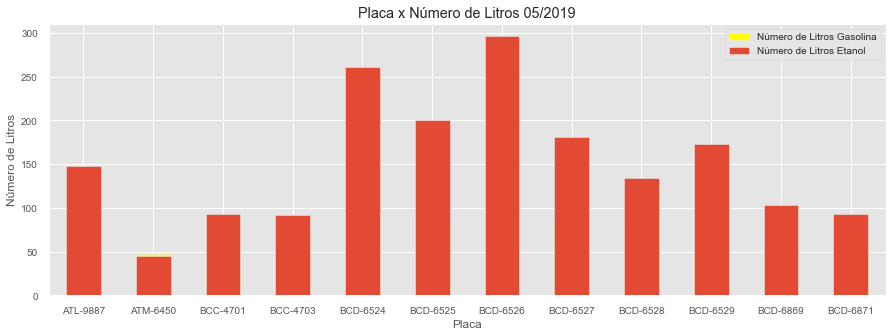

In [12]:
#set ggplot style
plt.style.use('ggplot')

#create the figure and the axes
fig, ax = plt.subplots()
dftpg = dft[dft['Produto'] == 'GASOLINA']
dftpe = dft[dft['Produto'] == 'ETANOL']

#plot the data and get the average
dftpg.plot(kind='bar', y = "Nr Litros", x ="Placa", rot = 0, ax=ax, figsize=(15, 5), color=("yellow"))
dftpe.plot(kind='bar', y = "Nr Litros", x ="Placa", rot = 0, ax=ax, figsize=(15, 5))

#set limits and labels
#avggas = dftpg["Valor Litro"].mean()
#ax.axvline(avggas, color='b', label='Média', linestyle='--', linewidth=1)
#avgeta = dftpg["Valor Litro"].mean()
#ax.axvline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
ax.legend(["Número de Litros Gasolina", "Número de Litros Etanol", "Valor por Litro Gasolina"])
ax.set(title='Placa x Número de Litros 05/2019', xlabel='Placa', ylabel='Número de Litros')

<AxesSubplot:xlabel='Placa'>

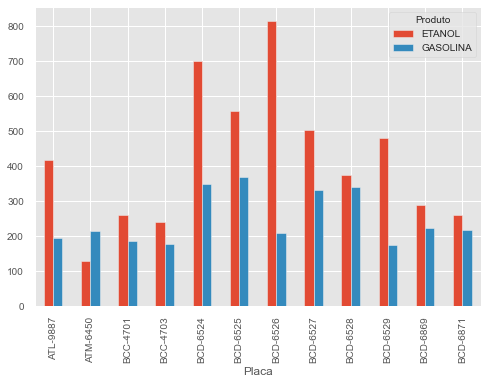

In [13]:
dft.groupby(['Placa', 'Produto'])['Valor Abast.'].mean().unstack().plot.bar()

<AxesSubplot:xlabel='Placa'>

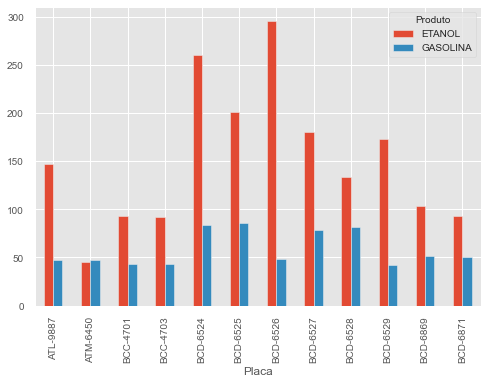

In [14]:
dft.groupby(['Placa', 'Produto'])['Nr Litros'].mean().unstack().plot.bar()

[Text(0.5, 1.0, 'Placa x Valor por Litro 05/2019'),
 Text(0.5, 0, 'Placa'),
 Text(0, 0.5, 'Valor por Litro')]

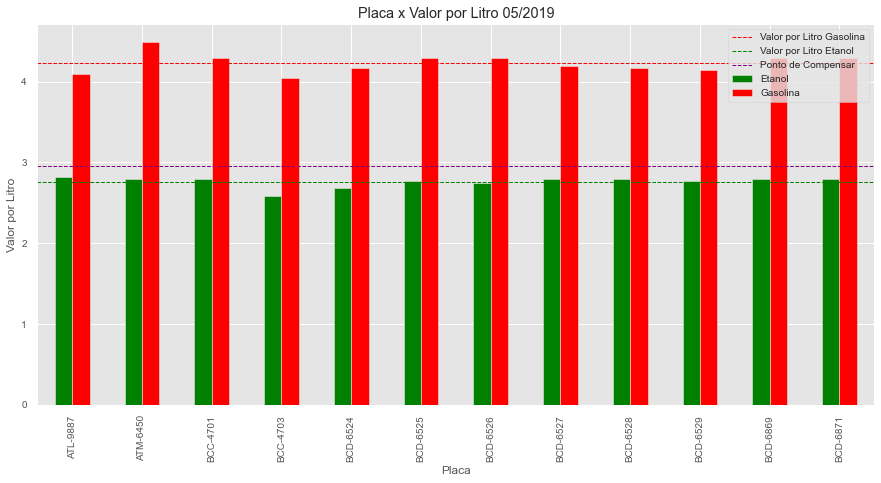

In [15]:
fig, ax = plt.subplots()
dft.groupby(['Placa', 'Produto'])['Valor Litro'].mean().unstack().plot(kind="bar", ax=ax, color=['g', 'r'],figsize=(15,7))

avggas = dftpg["Valor Litro"].mean()
ax.axhline(avggas, color='r', label='Média', linestyle='--', linewidth=1)
avgeta = dftpe["Valor Litro"].mean()
ax.axhline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
worthGas = avggas * 0.7
ax.axhline(worthGas, color='purple', label='Média', linestyle='--', linewidth=1)
ax.legend(["Valor por Litro Gasolina", "Valor por Litro Etanol", "Ponto de Compensar", 'Etanol', 'Gasolina'])
ax.set(title='Placa x Valor por Litro 05/2019', xlabel='Placa', ylabel='Valor por Litro')

[Text(0.5, 1.0, 'Placa x Valor por Litro 05/2019'),
 Text(0.5, 0, 'Placa'),
 Text(0, 0.5, 'Valor por Litro')]

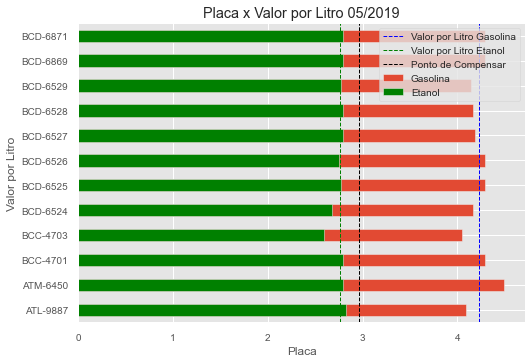

In [16]:
#set ggplot style
plt.style.use('ggplot')

#create the figure and the axes
fig, ax = plt.subplots()
dftpg = dft[dft['Produto'] == 'GASOLINA']
dftpe = dft[dft['Produto'] == 'ETANOL']

#plot the data and get the average
dftpg.plot(kind='barh', y = "Valor Litro", x ="Placa", rot = 0, ax=ax,)
dftpe.plot(kind='barh', y = "Valor Litro", x ="Placa", rot = 0, ax=ax, color='green')

#set limits and labels
avggas = dftpg["Valor Litro"].mean()
ax.axvline(avggas, color='b', label='Média', linestyle='--', linewidth=1)
avgeta = dftpe["Valor Litro"].mean()
ax.axvline(avgeta, color='g', label='Média', linestyle='--', linewidth=1)
worthGas = avggas * 0.7
ax.axvline(worthGas, color='black', label='Média', linestyle='--', linewidth=1)

ax.legend(["Valor por Litro Gasolina", "Valor por Litro Etanol", "Ponto de Compensar", 'Gasolina', 'Etanol'])
ax.set(title='Placa x Valor por Litro 05/2019', xlabel='Placa', ylabel='Valor por Litro')
#ax1.legend(["Valor por Litro Gasolina", "Número de Litros Etanol"])
#ax1.set(title='Placa x Número de Litros 05/2019 Etanol', xlabel='Placa', ylabel='Número de Litros')

In [17]:
df["Produto"].value_counts()

ETANOL      110
GASOLINA     74
DIESEL       57
Name: Produto, dtype: int64

In [18]:
avgeta = dftpe["Valor Litro"].mean()
avgeta

2.76

In [19]:
df["Produto"].value_counts(normalize=True)

ETANOL      0.456432
GASOLINA    0.307054
DIESEL      0.236515
Name: Produto, dtype: float64

<AxesSubplot:title={'center':'Nr Litros'}, ylabel='Frequency'>

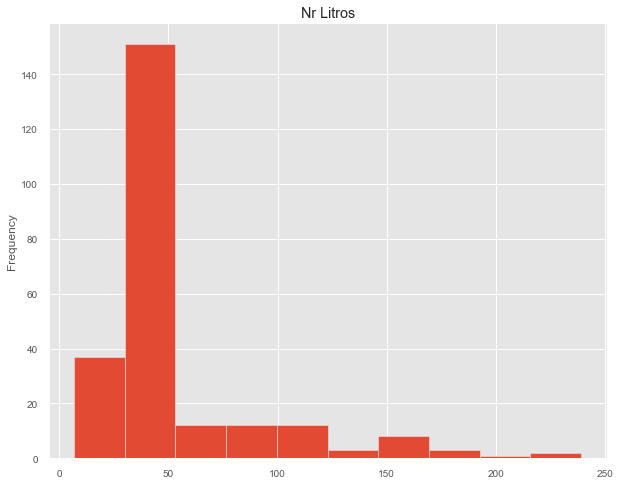

In [20]:
#Ploting
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
df["Nr Litros"].plot(kind='hist', title="Nr Litros")

<AxesSubplot:title={'center':'Valor Abastecido'}, ylabel='Frequency'>

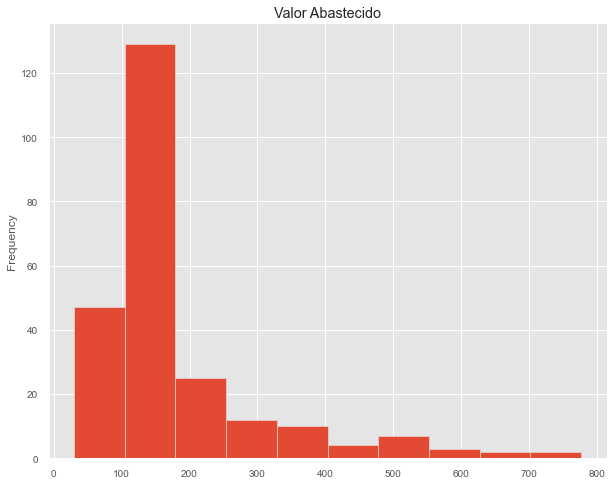

In [21]:
df["Valor Abast."].plot(kind='hist', title = "Valor Abastecido")

In [22]:
df["Nr Litros"].describe()

count    241.000000
mean      54.117647
std       39.384046
min        6.738000
25%       37.470000
50%       44.130000
75%       50.649000
max      239.140000
Name: Nr Litros, dtype: float64

<AxesSubplot:>

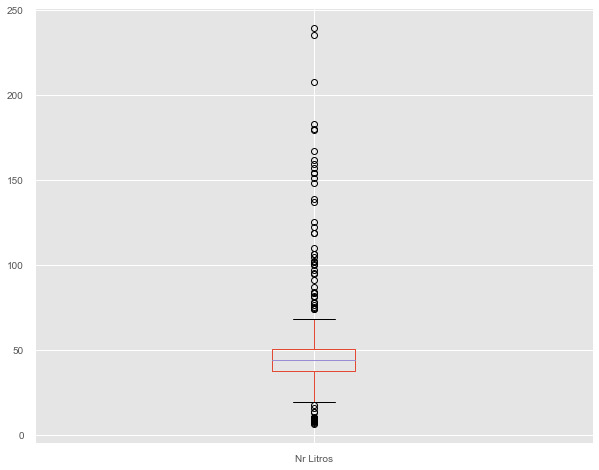

In [23]:
df["Nr Litros"].plot(kind="box")

<AxesSubplot:title={'center':'Valor Abast. x Nr Litros'}, xlabel='Valor Abast.', ylabel='Nr Litros'>

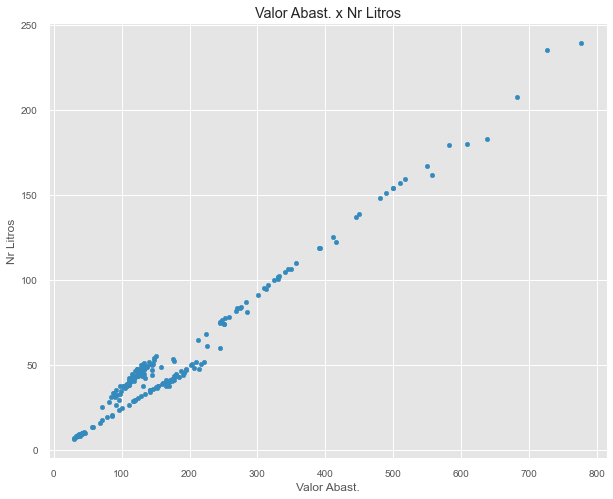

In [24]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

<AxesSubplot:title={'center':'Nr Litros'}, xlabel='Produto'>

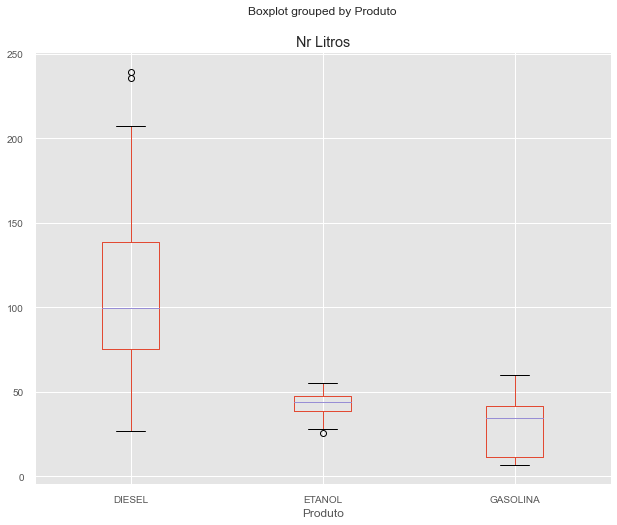

In [25]:
df.boxplot(column="Nr Litros", by="Produto")

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='Data'>

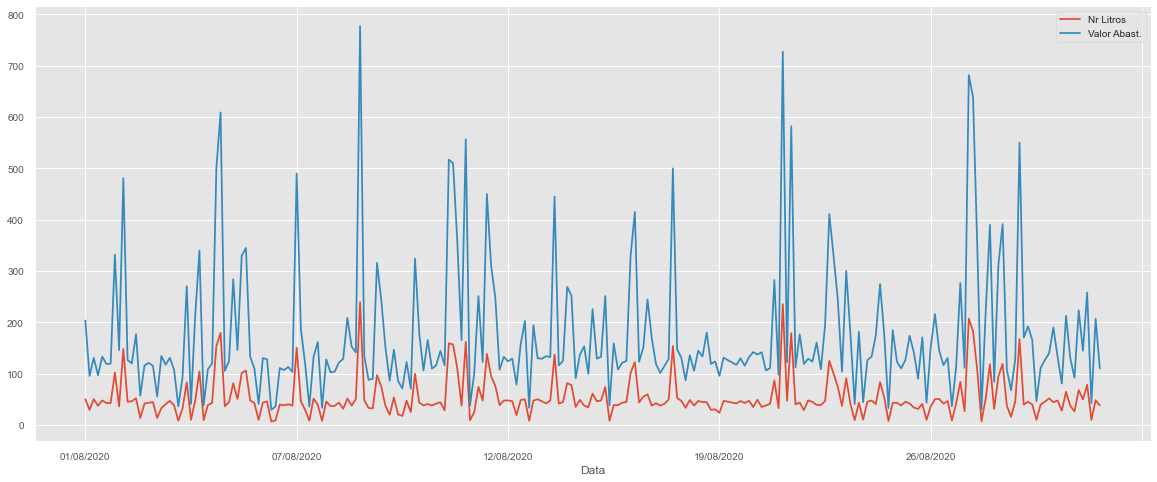

In [26]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

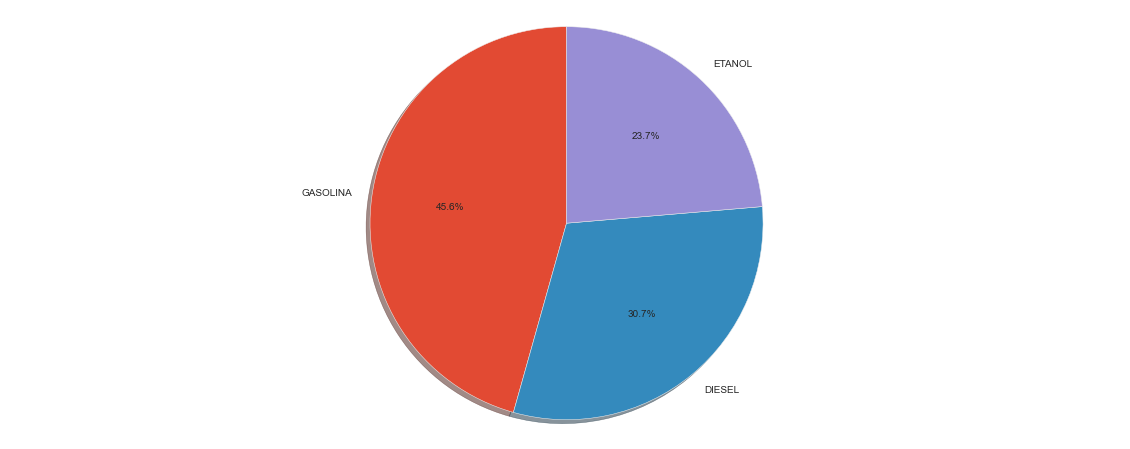

In [27]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

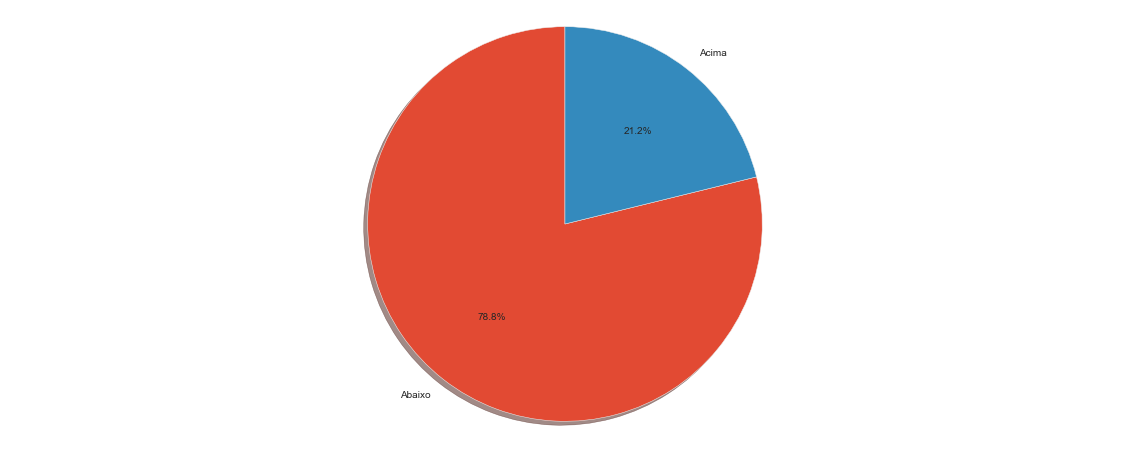

In [28]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

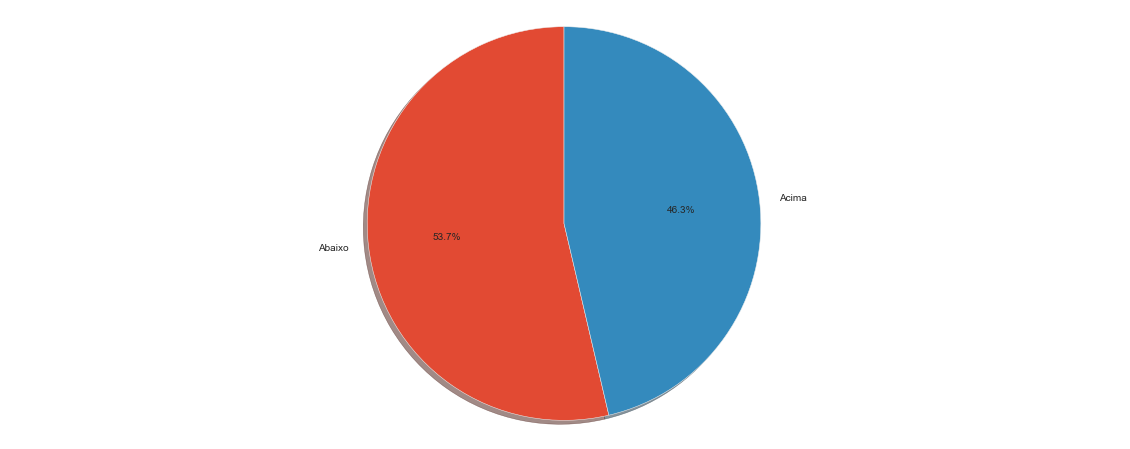

In [29]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

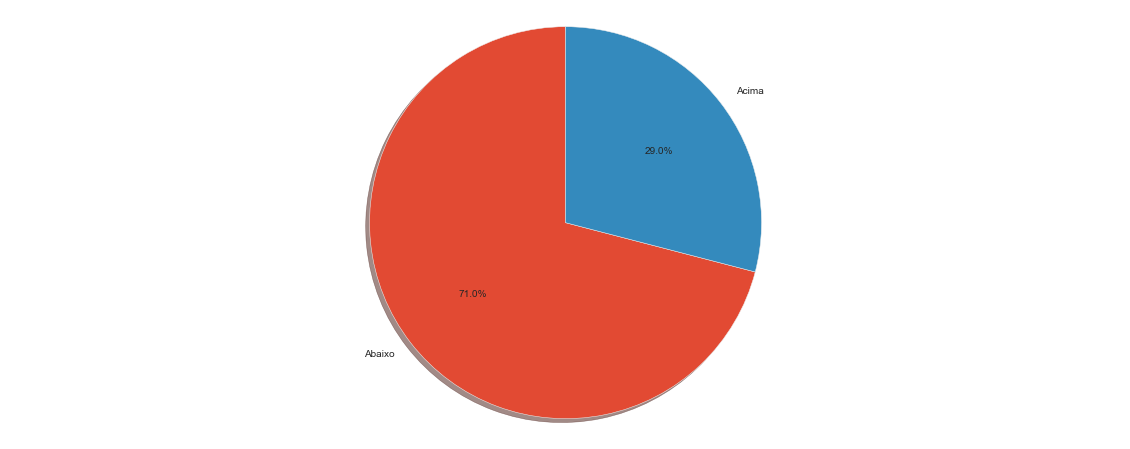

In [30]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


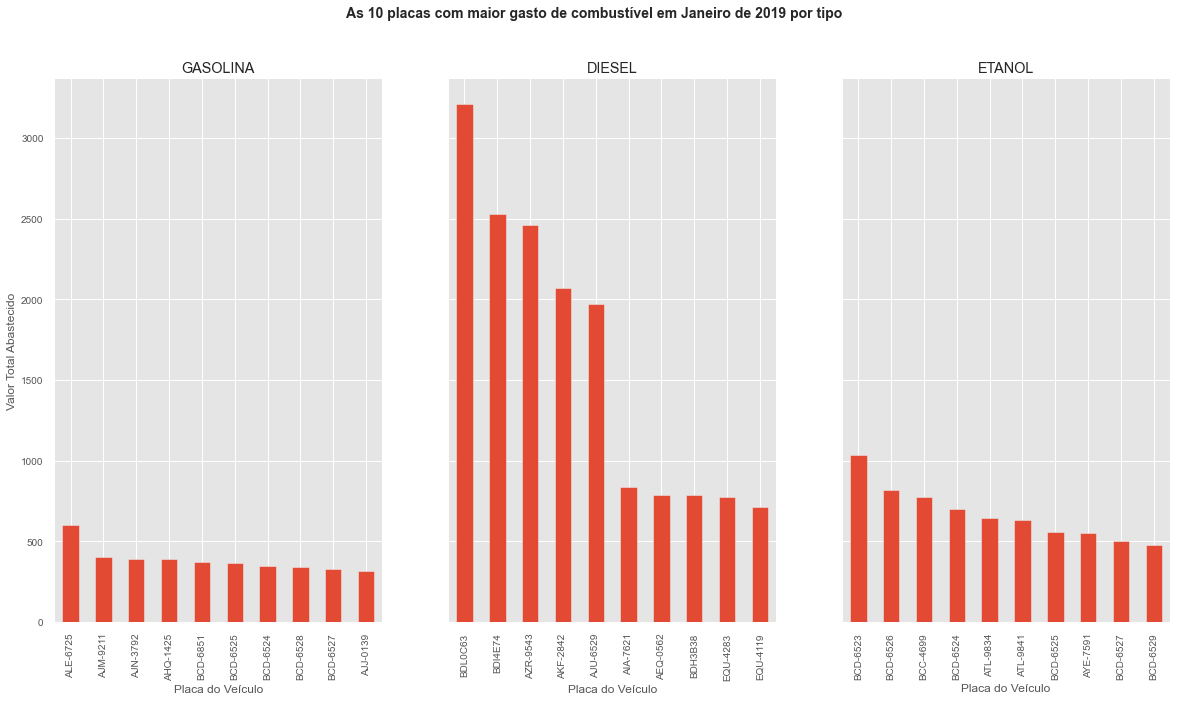

In [31]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]
#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot the data and get the average
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))
#plot GASOLINA
top_10_g.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='GASOLINA', xlabel='Placa do Veículo', ylabel='Valor Total Abastecido')
#plot DIESEL
top_10_d.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax1)
ax1.set(title='DIESEL', xlabel='Placa do Veículo', ylabel='')
#plot ETANOL
top_10_e.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax2)
ax2.set(title='ETANOL', xlabel='Placa do Veículo', ylabel='')

#set limits and labels
#ax.set(title='As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', xlabel='Placa do Veículo', ylabel='Valor Abastecido Total')
fig.suptitle('As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', fontsize=14, fontweight='bold')
    
#hide the legend
ax2.legend().set_visible(False)
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


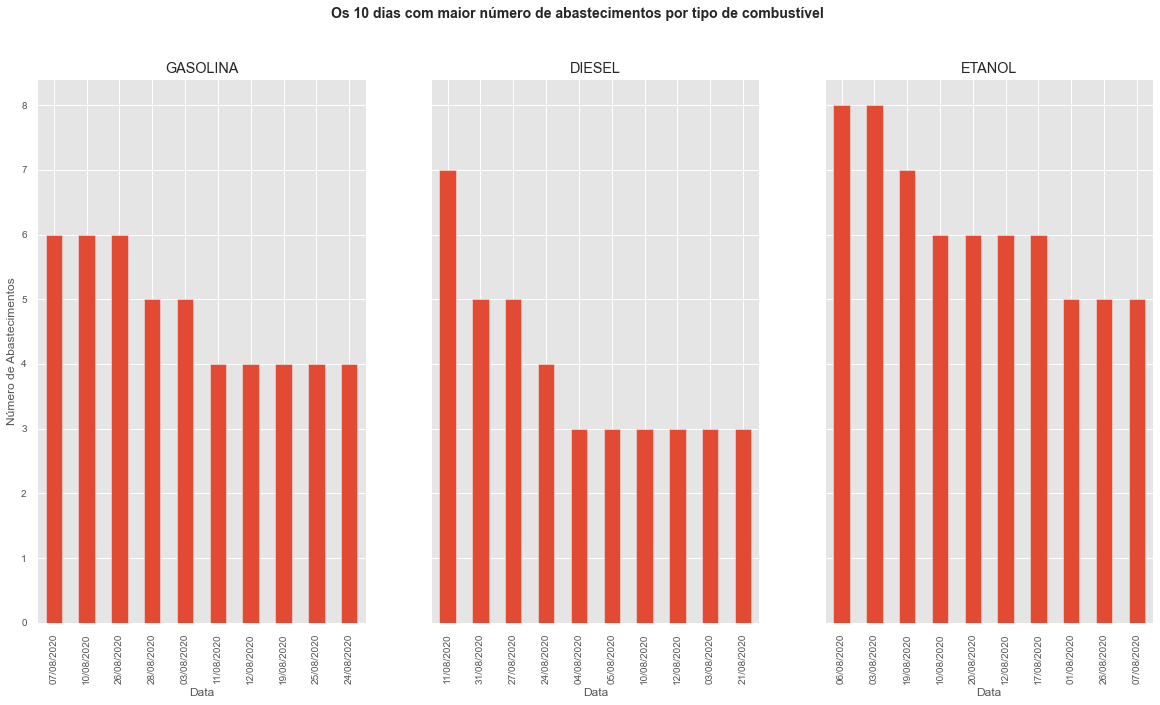

In [32]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]

#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))

#plot GASOLINA
top_10_g.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax0)
ax0.set(title="GASOLINA", xlabel='Data', ylabel='Número de Abastecimentos')

#plot DIESEL
top_10_d.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax1)
ax1.set(title="DIESEL", xlabel='Data', ylabel='')

#plot ETANOL
top_10_e.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax2)
ax2.set(title="ETANOL", xlabel='Data', ylabel='')

#set limits and labels
fig.suptitle('Os 10 dias com maior número de abastecimentos por tipo de combustível', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


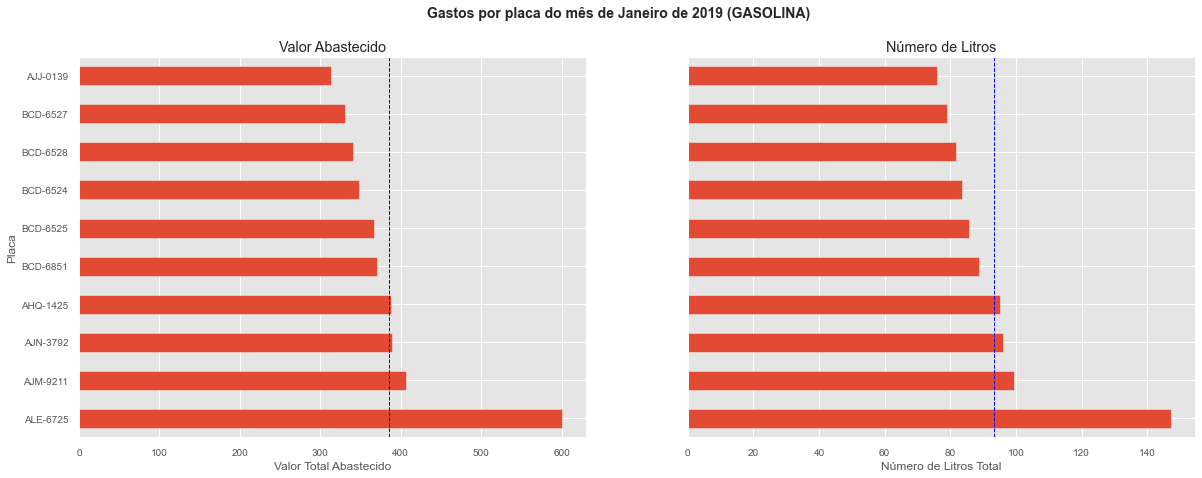

In [33]:
#get the figure and the axes
top_10 = df[df["Produto"] == "GASOLINA"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (GASOLINA)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


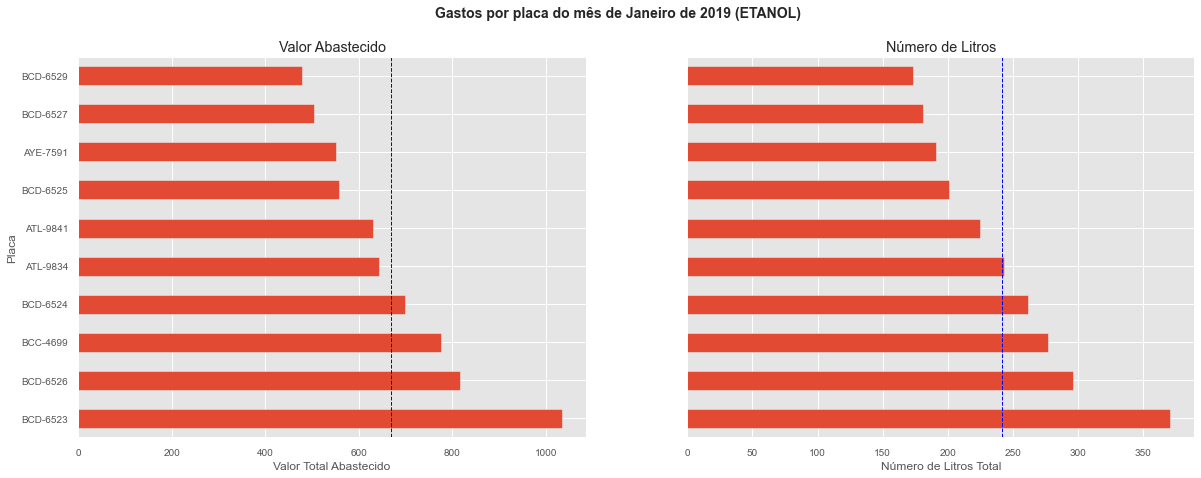

In [34]:
#get the figure and the axes
top_10 = df[df["Produto"] == "ETANOL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (ETANOL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


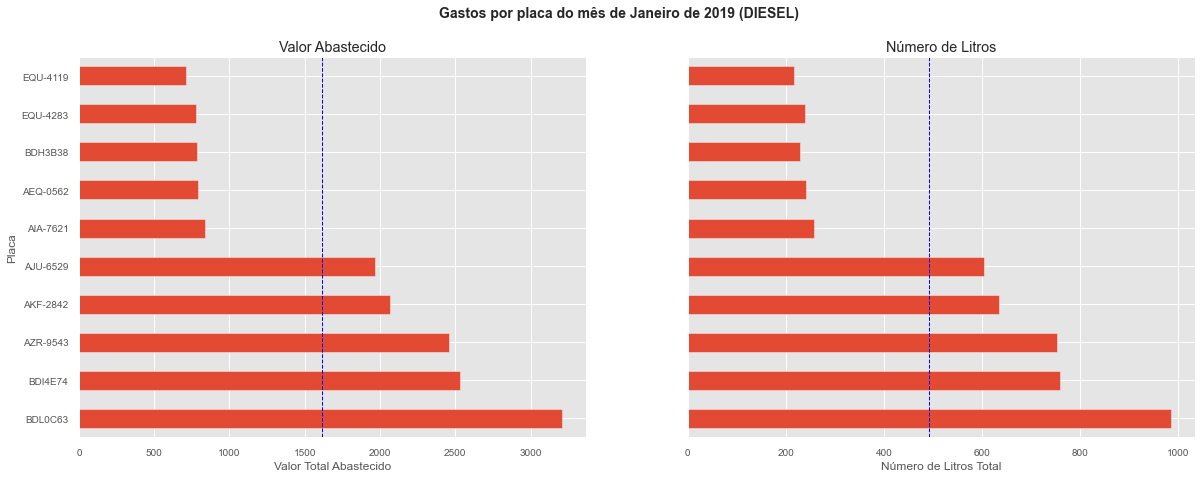

In [35]:
#get the figure and the axes
top_10 = df[df["Produto"] == "DIESEL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (DIESEL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


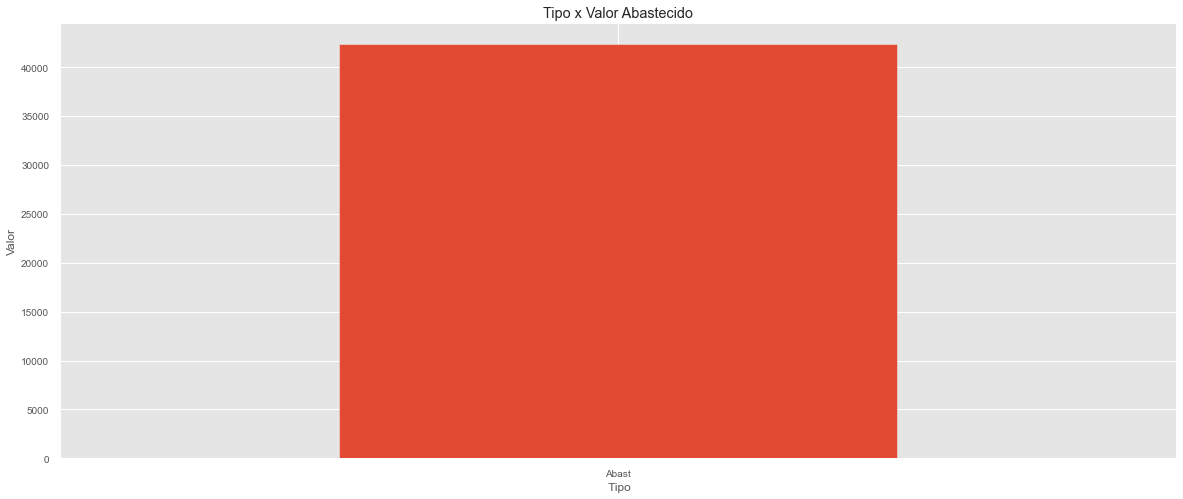

In [36]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Tipo')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Tipo': 'Tipo', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Tipo", rot = 0, ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Tipo x Valor Abastecido', xlabel=' Tipo', ylabel='Valor')

#hide the legend
ax.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


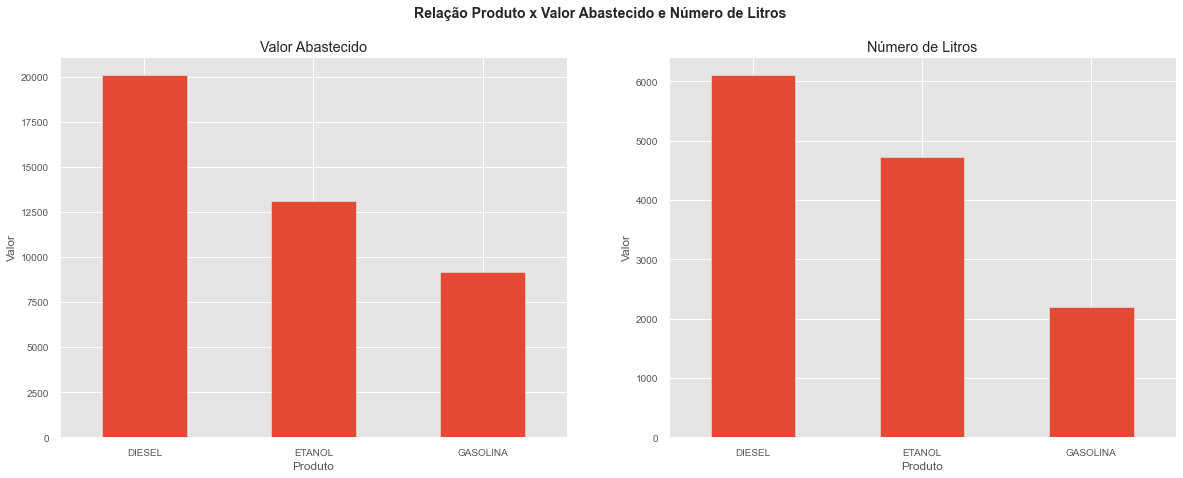

In [37]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


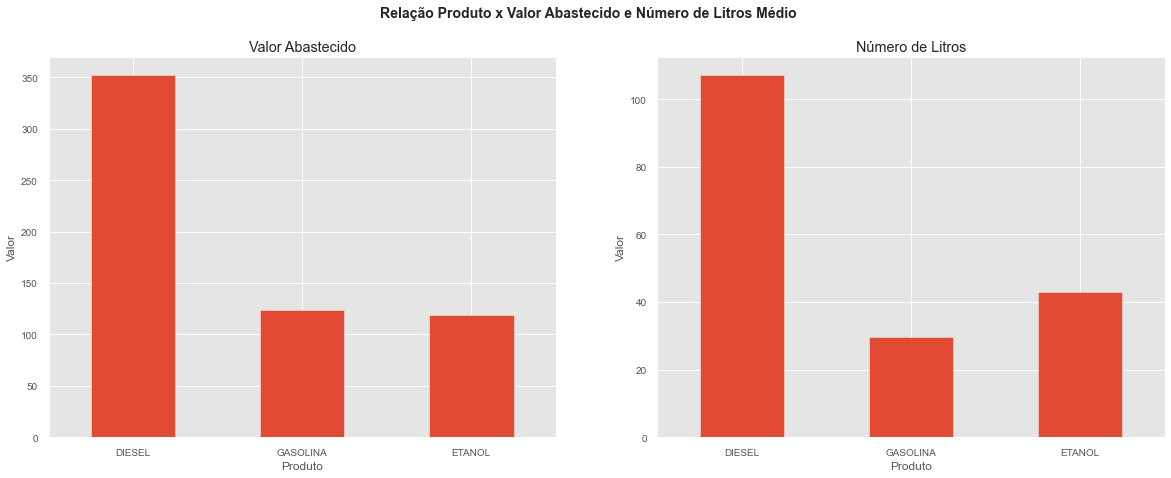

In [38]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'mean', 'Nr Litros': 'mean'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros Médio', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


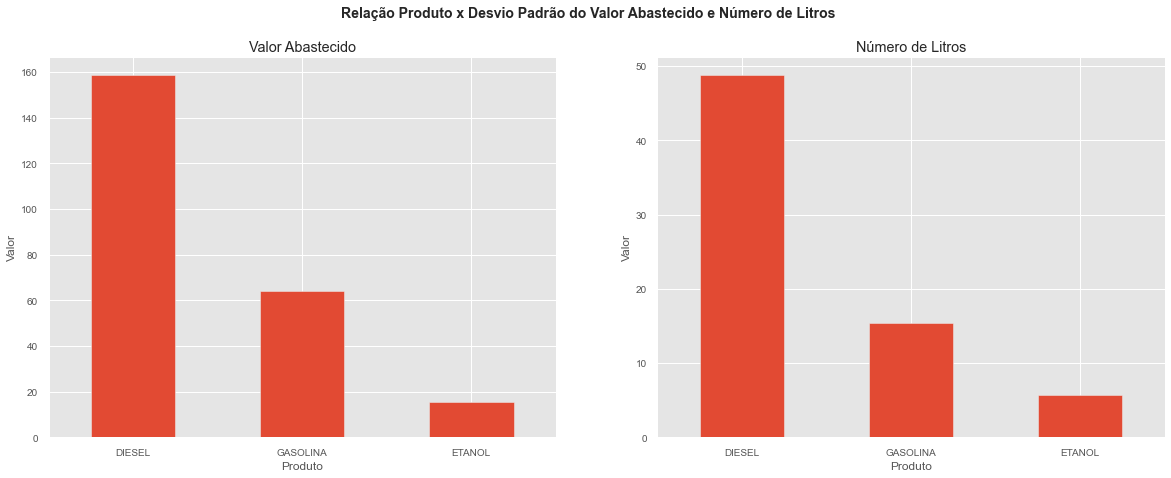

In [39]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'std', 'Nr Litros': 'std'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Desvio Padrão do Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)